(63, 4)


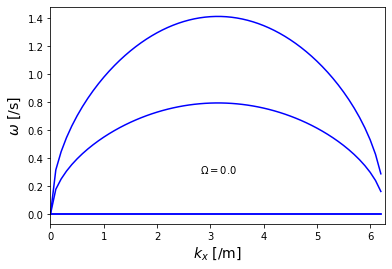

In [7]:
import numpy as np

M = 1.
C = 1.
Ct = 0.1
w0 = np.sqrt(C / M)
wt = np.sqrt(Ct / M)
precision = 1e-1
ks = np.arange(0, 2 * np.pi, precision)
O = 0.

evals_all = []
evecs_all = []
for k in ks:
    K = np.exp(1.j * k)
    # Hl = w0**2 * np.array([
    #     [2 - K - K.conj() -2.j * O / w0**2, 0],
    #     [0, 0]
    # ])
    # Ht = wt**2 * np.array([
    #     [0, 0],
    #     [0, 2 - K + K.conj() - 2.j * O / wt**2]
    # ])
    # H = Hl + Ht

    # H = w0**2 * np.array([
    #     [2 - K - K.conj(), - 2.j * O / w0**2],
    #     [2.j * O / w0**2, 0.1 *(2 - K - K.conj())]
    # ])

    L11 = w0**2 * np.array([
        [2 - K - K.conj(), 0.],
        [0,  0.1 * (2 - K - K.conj())]
    ])
    Oh = np.array([
        [0, O],
        [-O, 0]
    ])

    H = np.vstack([
        np.hstack([np.zeros((2,2)), np.eye(2)]),
        np.hstack([L11, 2.j * Oh])
    ])

    evals, evecs = np.linalg.eig(H)
    idcs = np.argsort(evals)
    evals, evcs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape)


# ws = []
# for k in ks:
#     K = np.exp(1.j * k)

#     w = 2 * O / (2 - K - K.conj())
#     ws.append(w)
# ws = np.array(ws)
# print(min(ws))



import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(evals_all.shape[1]):
    plt.plot(ks, np.sqrt(evals_all[:, i]).real, color='blue')
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.figtext(.47, .3, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.show()
# fig.savefig("1dc-dispersion-" + f'{O:.1f}' + ".png") 




